# 1. Diseño Eurístico de filtros analógicos

## 1.1. Diseñar un filtro pasa bajas

Diseñe un filtro pasa bajas con frecuencia de corte $\omega_c=1$

**¿Cúantas combinaciónes de $x_0$, $x_0^*\in\mathbb{C}$ cumplen $x_0x_0^*=1$?**


Sean $x_0=A_0e^{j\theta}$ y $x_0^*=A_0e^{-j\theta}$.

$$\left(s-A_0e^{j\theta}\right)\left(s-A_0e^{-j\theta}\right)=s^2-2A_0cos(\theta)s+A_0^2$$
donde $$A_0^2 = \sigma^2+\omega^2$$

Del ejercicio, $x_0x_0^*=1$ 
$$\omega^2 = 1 - \sigma^2$$

Sup: $\sigma^2=0.5625\implies \omega^2=0.4375$

Sup: $\sigma^2=0.25\implies \omega^2=0.9375$

In [1]:
#NOTE importar bibliotecas
import numpy             as np
import matplotlib.pyplot as plt

from scipy import signal

In [2]:
#definir funcion
def plot_bode(Hs,color='b'):
    w, mag, phas = signal.bode(Hs)
    plt.figure('Magnitud')
    plt.semilogx(w, mag, color,linewidth=3)
    plt.grid('on')
    plt.figure('Fase')
    plt.semilogx(w, phas, color, linewidth=3)
    plt.grid('on')
    
    return plt

In [3]:
re  = np.array( [.75   , .5  ] )
im  = np.array( [.66143, .866] )
wo  = re**2 + im**2
eps = 2*np.cos(np.arctan(im/re))

print eps
print wo

[ 1.50000777  1.000022  ]
[ 0.99998964  0.999956  ]


In [4]:
#Coeficientes
p = np.array(  [ np.ones( eps.shape[0] ), eps, wo ]  ).T
print p

[[ 1.          1.50000777  0.99998964]
 [ 1.          1.000022    0.999956  ]]


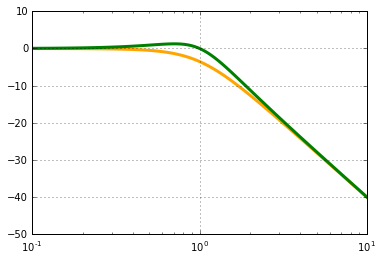

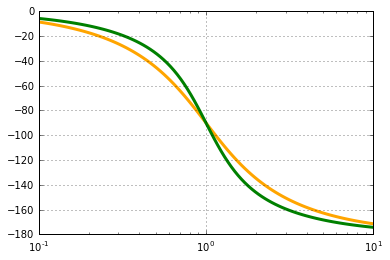

In [5]:
sy0 = signal.lti([1], p[0])
sy1 = signal.lti([1], p[1])

plot_bode(sy0,'orange')
plot_bode(sy1,'g')

plt.show()


In [6]:
x = np.poly1d( [1] )
for i in p:
    x *= np.poly1d(i)

print np.poly1d(x,variable='s')

   4       3       2
1 s + 2.5 s + 3.5 s + 2.5 s + 0.9999


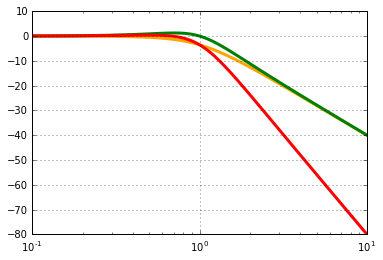

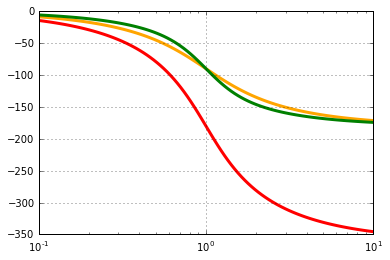

In [7]:
sy = signal.lti([1], x)

plot_bode(sy0,'orange')
plot_bode(sy1,'g')
plot_bode(sy,'r')
plt.show()

In [65]:
re   = np.array( [.5   , .2  ] )
wo   = np.ones(re.shape)
im   = wo - re
alfa = -2*np.cos( np.pi - np.arctan( np.sqrt(im/re) )  )
alfa = np.array(  [np.sqrt(2), np.sqrt(2)]  )
print re
print wo
print im
print alfa

[ 0.5  0.2]
[ 1.  1.]
[ 0.5  0.8]
[ 1.41421356  1.41421356]


In [66]:
p = np.array(  [ np.ones( alfa.shape[0] ), alfa, wo ]  ).T
print p

[[ 1.          1.41421356  1.        ]
 [ 1.          1.41421356  1.        ]]


In [67]:
x = [ np.poly1d(i) for i in p]
H = x[0]

for i in x[1:]:
    H *= i

print H

   4         3     2
1 x + 2.828 x + 4 x + 2.828 x + 1


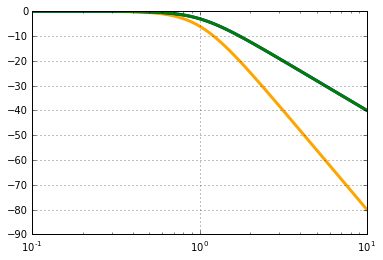

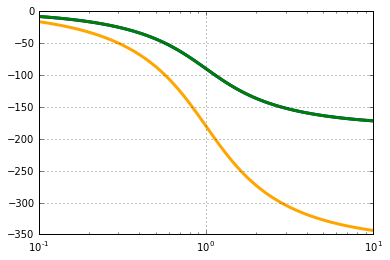

In [68]:
plot_bode( signal.lti([1], H),'orange' )

color = ['b','g','r','c','m','y','k']
for i,c in zip(x,color):
    plot_bode( signal.lti([1], i), c )
    
plt.show()